##### Student Performance Indicator

Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

# 1)Problem Statement

This project understands how the student's performance(test score) affected by other variable such as
gender,ethinicity,parental level of education,lunch and test preparation course

# 2)Data collection

-->Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
-->Data consists of 1000 rows and 8 columns

# 2.1)Import data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


##### import csv data as panda dataframe

In [3]:
df=pd.read_csv(r"D:\Project1_app\ml_projectkrish1\Notebook\data\stud.csv")

##### show top 5 records

In [5]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### shape of the dataset

In [6]:
df.shape

(1000, 8)

# 2.2 Dataset Information

In [8]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

-->gender:sex of students(male/female)
-->race_ethinicity:group A,group B,group C, group D,group E
-->parental_level_of_education:some college,associate's degree,high school,some high school,
-->bachelor's degree,master's degree   
-->lunch:standard,free/reduced
-->test_preparation_course:none,completed
-->math_score
-->reading_score
-->writing_score

In [13]:
df["test_preparate"].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

# 3. Data checks to perform

In [ ]:
-->check missing values
-->check duplicates
-->check data types
-->check the number of unique values of each column
-->check statics of dataset
-->check various categories present in different categorical columns

#### 3.1 checking missing avlues

In [19]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###### insight: there are no missing values in the dataset

#### 3.2 checking for the duplicates

In [24]:
df.duplicated().sum()

0

#### insight:there are no duplicate values present in the dataset

### 3.3. Check datatypes

In [25]:
#checking for the null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### insight:5 string type data types and 3 integer data types are there

#### 3.4. checking for the number of  unique values of each columns

In [26]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 checking the statitics of dataset 

In [27]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### insight:


-->all means are very close to each other between 66 and 69
-->all standard deviation are also close between 14 and 15
-->there is mionimum value as 0 for maths,17 for reading score and 10 for writing score
-->maximum value is 100 for all

## 3.6. Exploring data

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
#printing different categories in categorical variables
print("different categories in 'genger':",end=" ")
print(df["gender"].unique())
print("categories in 'race_ethnicity':",end=" ")
print(df["race_ethnicity"].unique())
print("categories in 'parental level of education':",end=" ")
print(df["parental_level_of_education"].unique())
print("categories in 'lunch':",end=" ")
print(df["lunch"].unique())
print("categories in 'test_preparation_course':",end=" ")
print(df["test_preparation_course"].unique())

different categories in 'genger': ['female' 'male']
categories in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch': ['standard' 'free/reduced']
categories in 'test_preparation_course': ['none' 'completed']


In [47]:
#define numerical and categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

In [48]:
#print columns
print("numerical features:",numerical_features)
print("categorical features:",categorical_features)

numerical features: ['math_score', 'reading_score', 'writing_score']
categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 adding columns for total score and average score

In [51]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average"]=df["total_score"]/3

In [52]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [61]:
reading_full=df[df["reading_score"]==100]["average"].count()
writing_full=df[df["writing_score"]==100]["average"].count()
math_full=df[df["math_score"]==100]["average"].count()

print(f"number of students with full marks in maths:{math_full}")
print(f"number of students with full marks in reading:{reading_full}")
print(f"number of students with full marks in writing:{writing_full}")

number of students with full marks in maths:7
number of students with full marks in reading:17
number of students with full marks in writing:14


In [65]:
reading_lessthan20=df[df["reading_score"]<20]["average"].count()
writing_lessthan20=df[df["writing_score"]<20]["average"].count()
math_lessthan20=df[df["math_score"]<20]["average"].count()

print(f"number of students with less than 20 marks in maths:{math_lessthan20}")
print(f"number of students with less than 20 marks in reading:{reading_lessthan20}")
print(f"number of students with less than 20 marks in writing:{writing_lessthan20}")

number of students with less than 20 marks in maths:4
number of students with less than 20 marks in reading:1
number of students with less than 20 marks in writing:3


##### insight

In [ ]:
-->students performed worst in maths
-->students performed good in reading

## 4. Exploring data(Visualization)

##### 4.1 visualize average score distribution to make some conclusion

In [ ]:
-->histogram
-->Kernal Distribuition function(KDE)

##### 4.1.1 Histogram & KDE

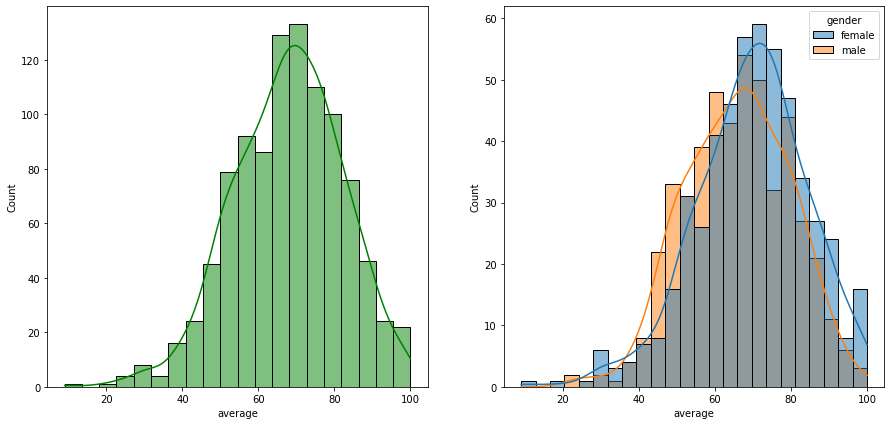

In [69]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x="average",bins=20,kde=True,color="g")
plt.subplot(1,2,2)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()

<AxesSubplot:xlabel='total_score', ylabel='Count'>

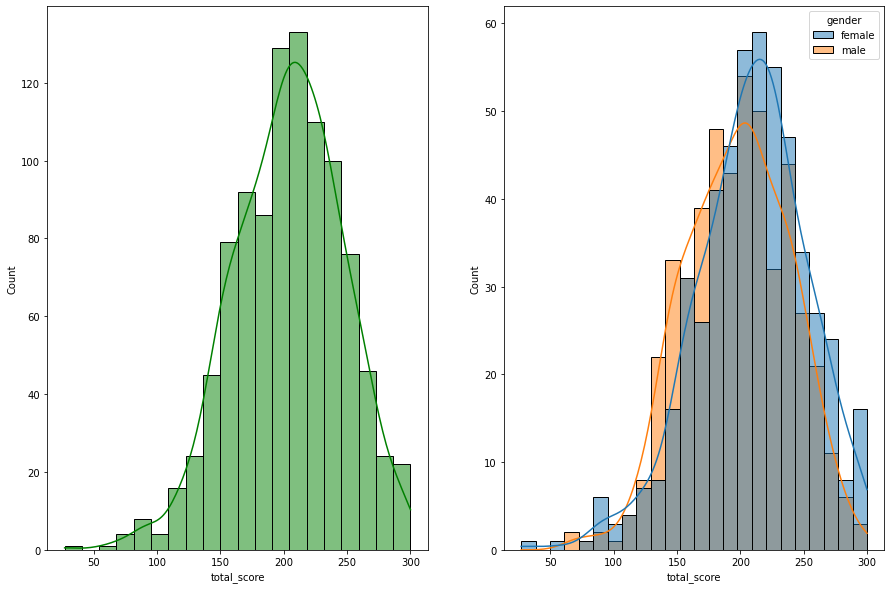

In [73]:
fig,axs=plt.subplots(1,2,figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(data=df,x="total_score",bins=20,kde=True,color="g")
plt.subplot(1,2,2)
sns.histplot(data=df,x="total_score",kde=True,hue="gender")

##### insight: Female students perform well than male students

<AxesSubplot:xlabel='average', ylabel='Count'>

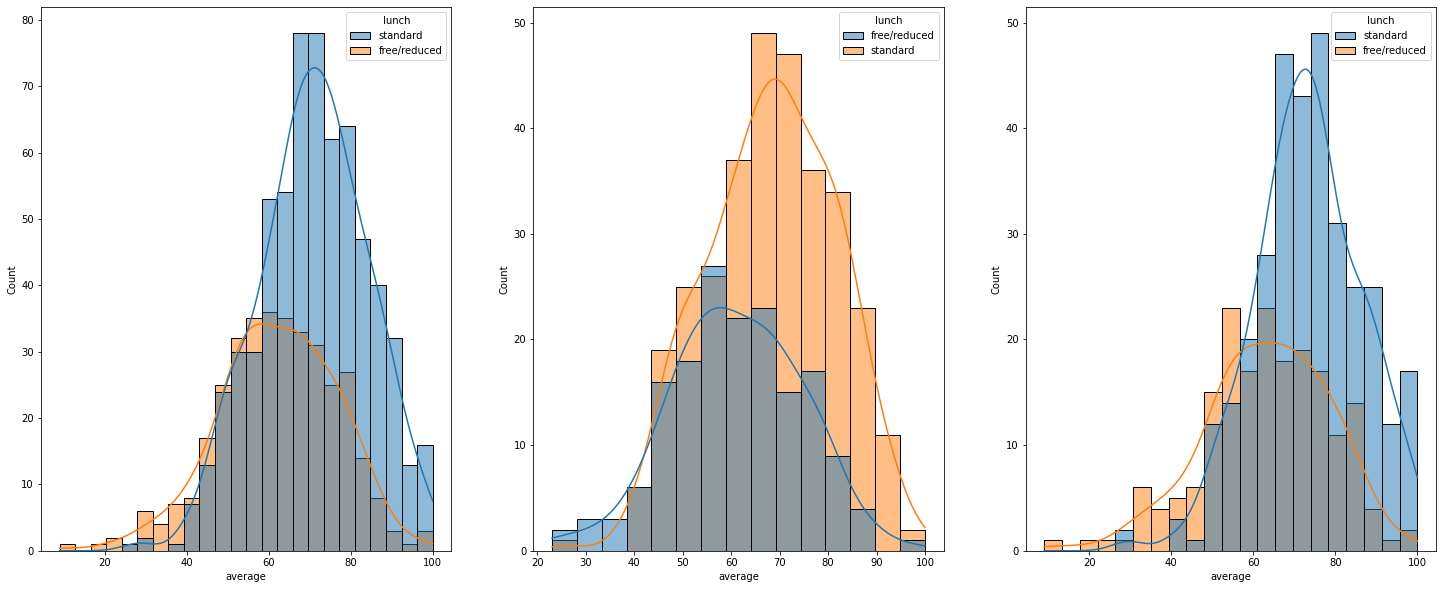

In [79]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x="average",kde=True,color="g",hue="lunch")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="lunch")
plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="female"],x="average",kde=True,hue="lunch")

##### Insight:Standard lunch perform well in exams even for male and female

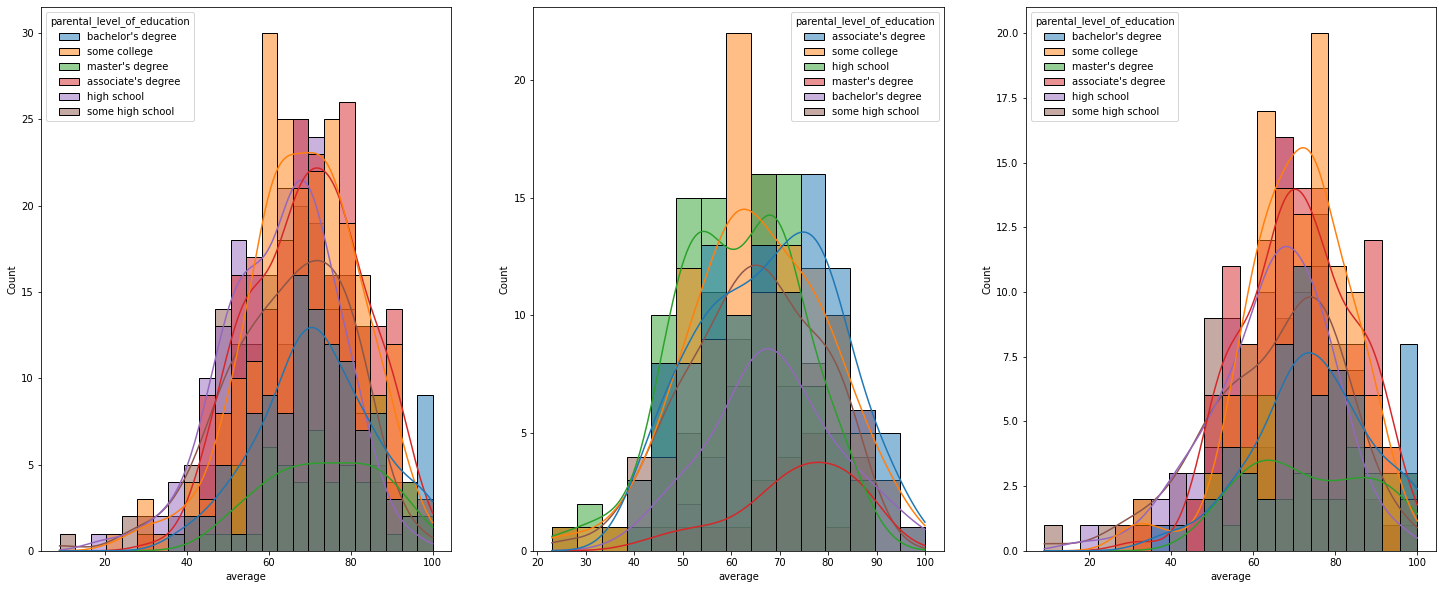

In [84]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x="average",kde=True,hue="parental_level_of_education")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="parental_level_of_education")
plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="female"],x="average",kde=True,hue="parental_level_of_education")
plt.show()

###### insight: In general parentys education will not help students to perform well in exam

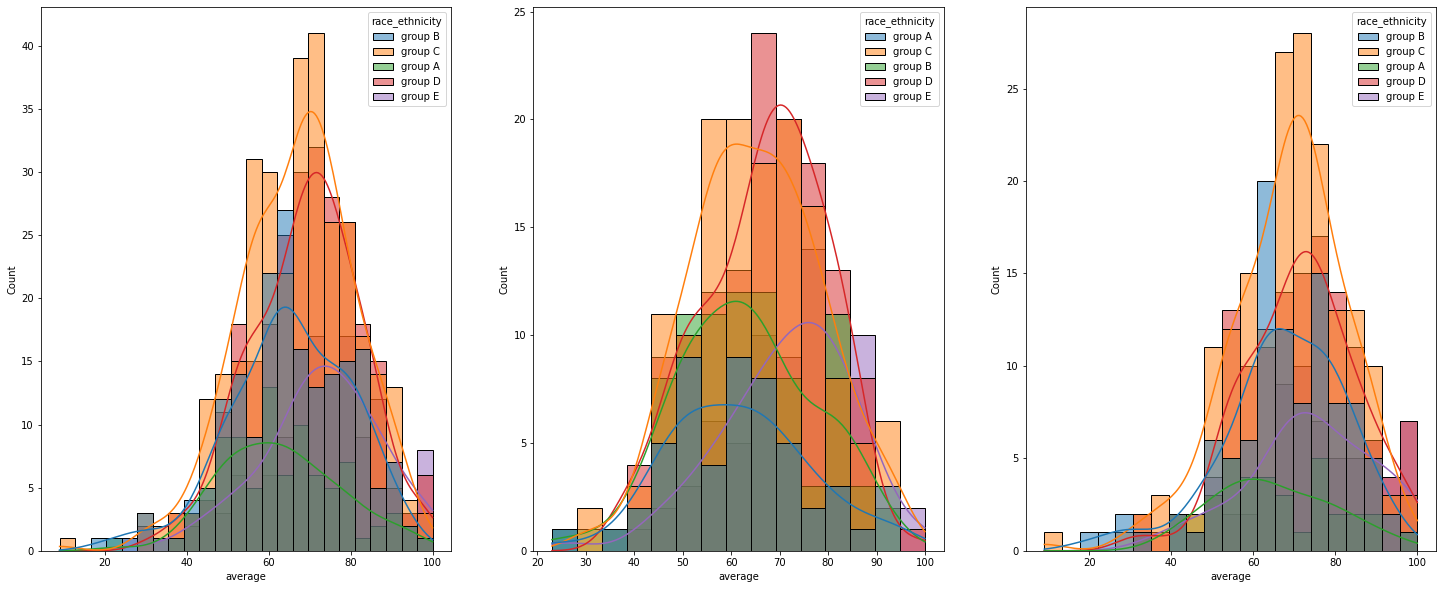

In [92]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x="average",kde=True,hue="race_ethnicity")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="race_ethnicity")
plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="female"],x="average",kde=True,hue="race_ethnicity")
plt.show()

##### insight: students of group A and group B perform poorly in exam

##### 4.2. Maximum score of students in all three subjects

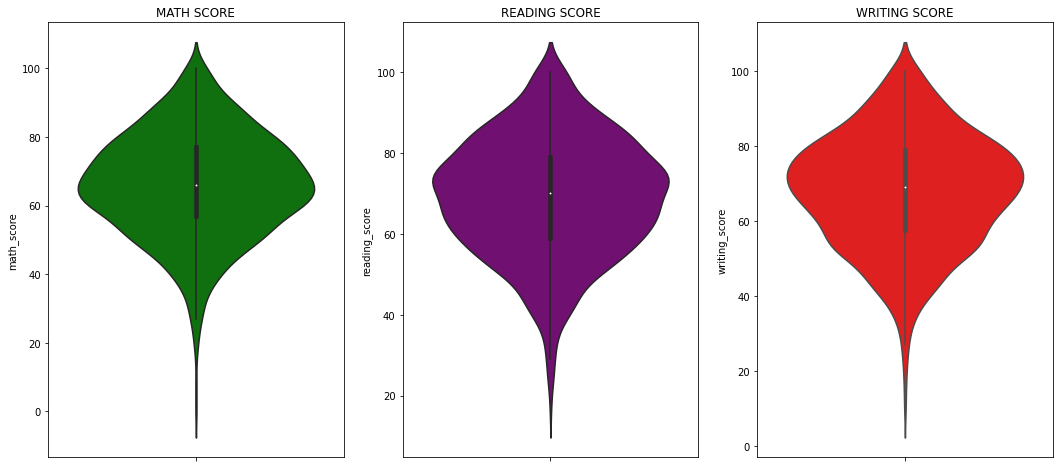

In [100]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title("MATH SCORE")
sns.violinplot(y="math_score",data=df,color="g")
plt.subplot(1,3,2)
plt.title("READING SCORE")
sns.violinplot(y="reading_score",data=df,color="purple")
plt.subplot(1,3,3)
plt.title("WRITING SCORE")
sns.violinplot(y="writing_score",data=df,color="red")
plt.show()


###### insights:most of the students score 60-80 in maths, and 50-80 in reading and writing

#### 4.3. multivariate analysis using pieplot

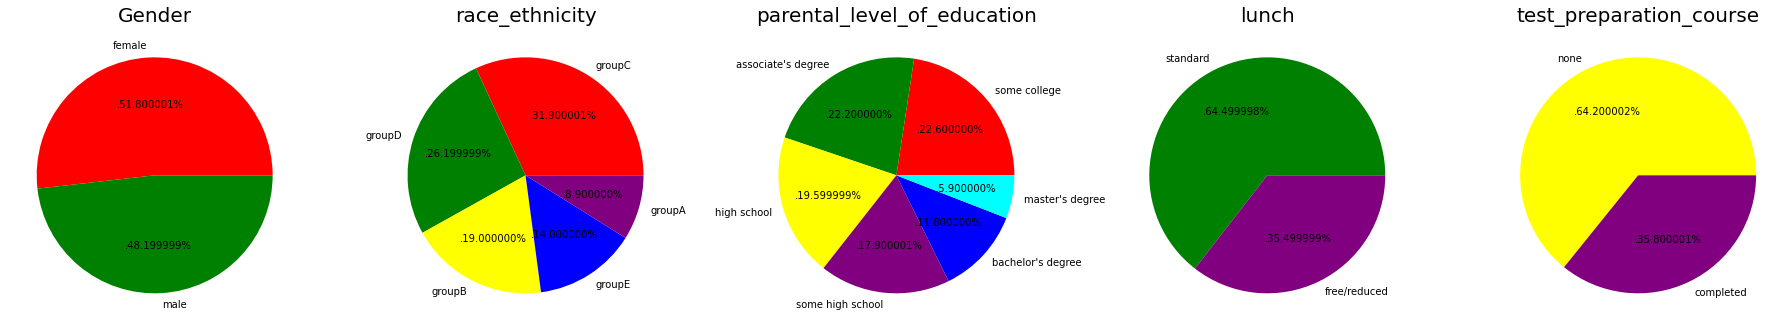

In [132]:
plt.figure(figsize=(25,10))

plt.subplot(1,5,1)
size=df["gender"].value_counts()
color=["red","green"]
label="female","male"
plt.pie(size,labels=label,colors=color,autopct=".%2f%%")
plt.title("Gender",fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
size=df["race_ethnicity"].value_counts()
label="groupC","groupD","groupB","groupE","groupA"
colors=["red","green","yellow","blue","purple"]
plt.pie(size,labels=label,colors=colors,autopct=".%2f%%")
plt.title("race_ethnicity",fontsize=20)
plt.axis("off")

plt.subplot(1,5,3)
size=df["parental_level_of_education"].value_counts()
label="some college","associate's degree","high school","some high school","bachelor's degree","master's degree"
colors=["red","green","yellow","purple","blue","cyan"]
plt.pie(size,labels=label,colors=colors,autopct=".%2f%%")
plt.title("parental_level_of_education",fontsize=20)
plt.axis("off")

plt.subplot(1,5,4)
size=df["lunch"].value_counts()
label="standard","free/reduced"
colors=["green","purple"]
plt.pie(size,labels=label,colors=colors,autopct=".%2f%%")
plt.title("lunch",fontsize=20)
plt.axis("off")

plt.subplot(1,5,5)
size=df["test_preparation_course"].value_counts()
label="none","completed"
colors=["yellow","purple"]
plt.pie(size,labels=label,colors=colors,autopct=".%2f%%")
plt.title("test_preparation_course",fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.grid()
plt.show()

##### insight

In [ ]:
-->number of male and female students are almost same
-->number of students in group C is greatest
-->number of students with standard lunch are greatest
-->number of students who have not enrolled in test preparation course is greatest
-->number of students with parental education some college is higher,and after that associate's degree

#### 4.4 featurewise visualization


#### 4.4.1 Gender Column

In [ ]:
-->How is distribution of gender?
-->Is gender has any impact on student's performance?

##### univariate analysis(how is distribution of gender)

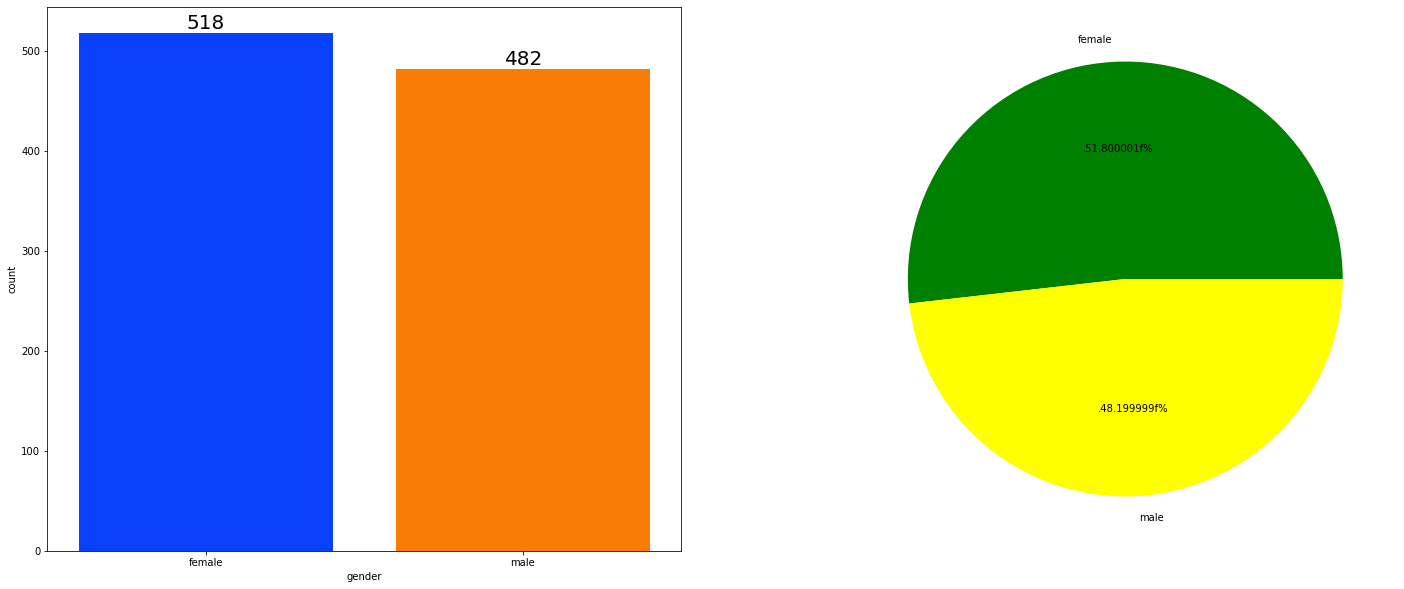

In [144]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(x=df["gender"],data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)


plt.pie(x=df["gender"].value_counts(),labels=["female","male"],colors=["green","yellow"],autopct=".%2ff%%")
plt.show()

##### Insight:

In [ ]:
-->gender has balanced data with female students are 518(52%) and male of 482(48%)

##### Bivariate Analysis(Is gender has any impact on student's performance?)

In [145]:
gender_group=df.groupby("gender").mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


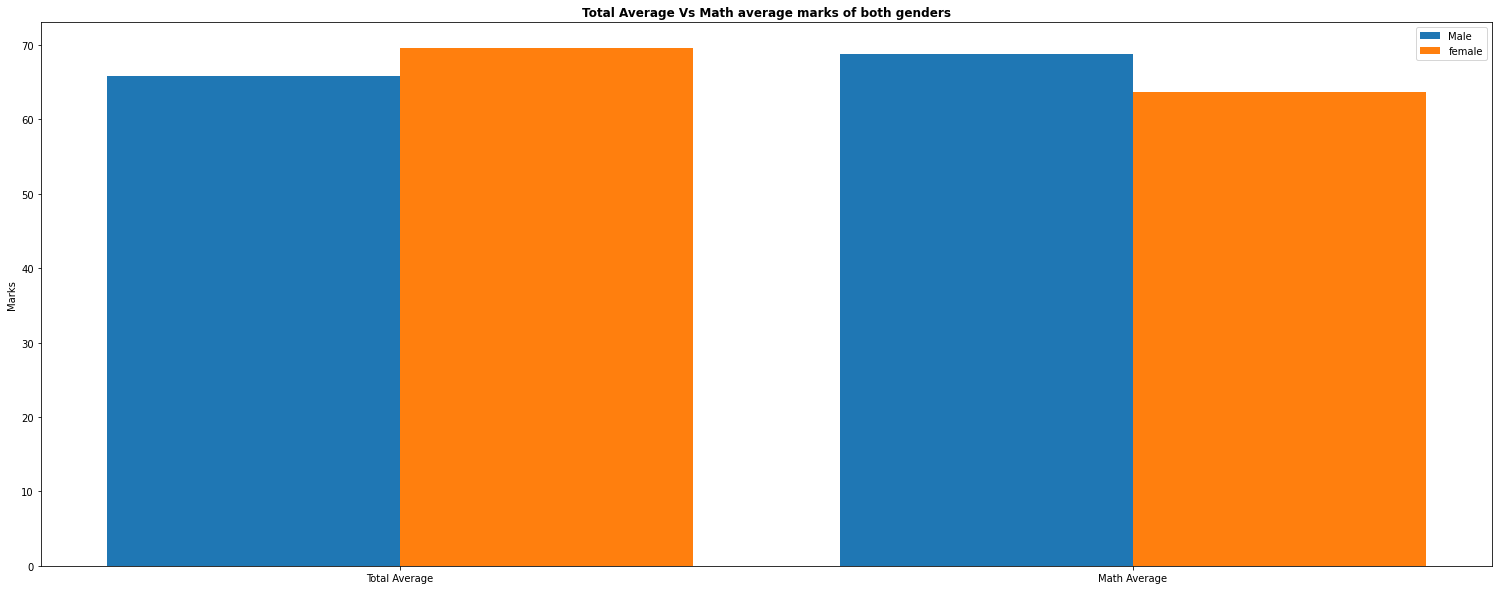

In [151]:
plt.figure(figsize=(26,10))
X=["Total Average","Math Average"]

female_score=[gender_group["average"][0],gender_group["math_score"][0]]
male_score=[gender_group["average"][1],gender_group["math_score"][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_score,0.4,label="Male")
plt.bar(X_axis+0.2,female_score,0.4,label="female")

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total Average Vs Math average marks of both genders",fontweight="bold")
plt.legend()
plt.show()


###### insight

In [ ]:
-->female have better average score than male students
-->But male students have scored good in maths

#### 4.4.2RACE_ETHNICITY COLUMN

In [ ]:
-->how is groupwise distribution?
-->is race_ethnicity has any impact on students performance?

###### UNIVARIATE ANALYSIS(how Is group wise distribution)

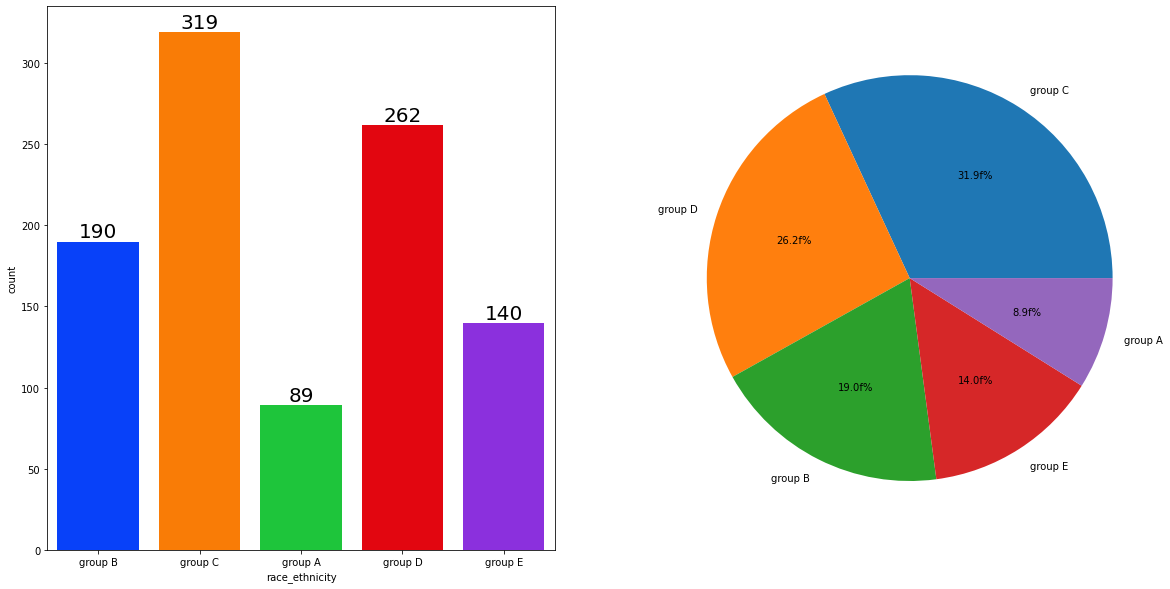

In [163]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df["race_ethnicity"],data=df,ax=ax[0],palette="bright",saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)

plt.pie(x=df["race_ethnicity"].value_counts(),labels=df["race_ethnicity"].value_counts().index,autopct="%1.1ff%%")
plt.show()

###### insight:


In [ ]:
-->most of the students belongs to groupC and groupD
-->less number of students belongs to groupA

###### BIVARIATE ANALYSIS(Is Race_ethnicity has any impact on students performance ?)

In [173]:
raceethnicity_group=df.groupby("race_ethnicity").mean()
raceethnicity_group


,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


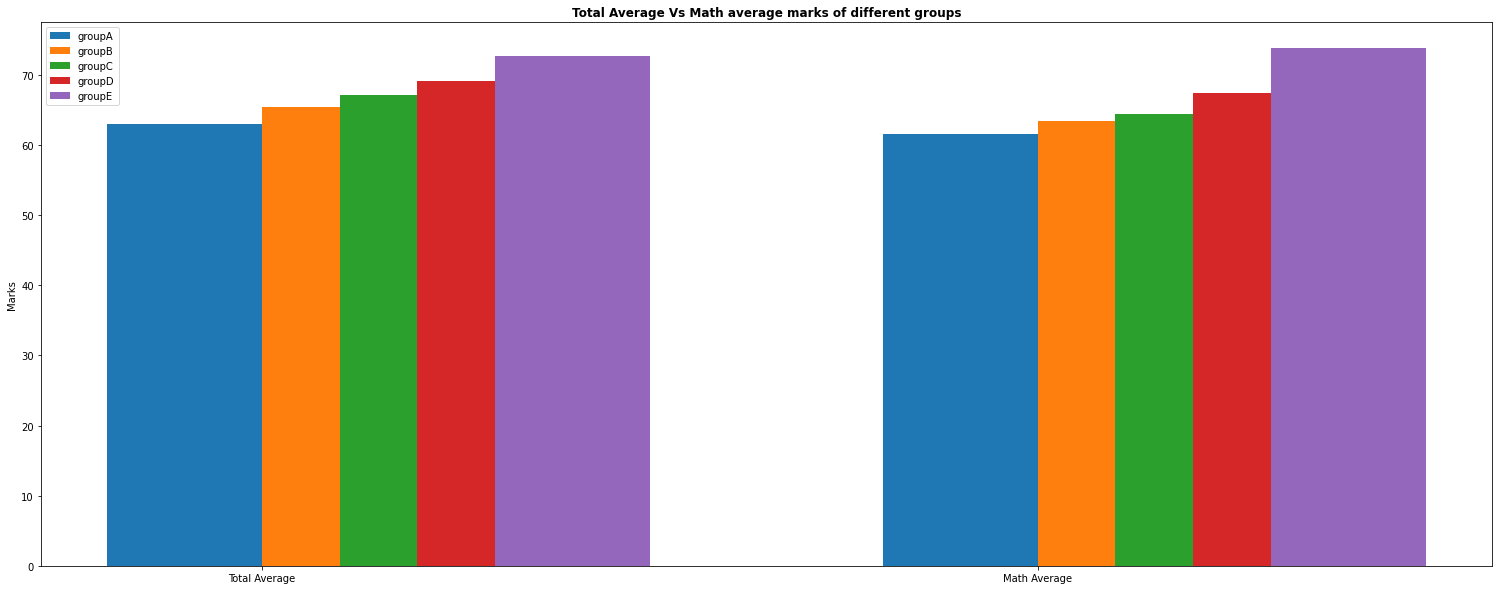

In [179]:

plt.figure(figsize=(26,10))
X=["Total Average","Math Average"]

groupA_score=[raceethnicity_group["average"][0],raceethnicity_group["math_score"][0]]
groupB_score=[raceethnicity_group["average"][1],raceethnicity_group["math_score"][1]]
groupC_score=[raceethnicity_group["average"][2],raceethnicity_group["math_score"][2]]
groupD_score=[raceethnicity_group["average"][3],raceethnicity_group["math_score"][3]]
groupE_score=[raceethnicity_group["average"][4],raceethnicity_group["math_score"][4]]

X_axis=np.arange(len(X))

plt.bar(X_axis-0.1,groupA_score,0.2,label="groupA")
plt.bar(X_axis+0.1,groupB_score,0.2,label="groupB")
plt.bar(X_axis+0.2,groupC_score,0.2,label="groupC")
plt.bar(X_axis+0.3,groupD_score,0.2,label="groupD")
plt.bar(X_axis+0.4,groupE_score,0.2,label="groupE")

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total Average Vs Math average marks of different groups",fontweight="bold")
plt.legend()
plt.show()


###### Insight:

-->groupE students have stored good marks
-->groupA student have stored less marks

##### 4.4.3 Parental alevel of Education column

In [ ]:
-->What is the educational background of student's parent
-->Is parental education has any impact on students performance

##### univariate analysis(what is educational background of students parent)

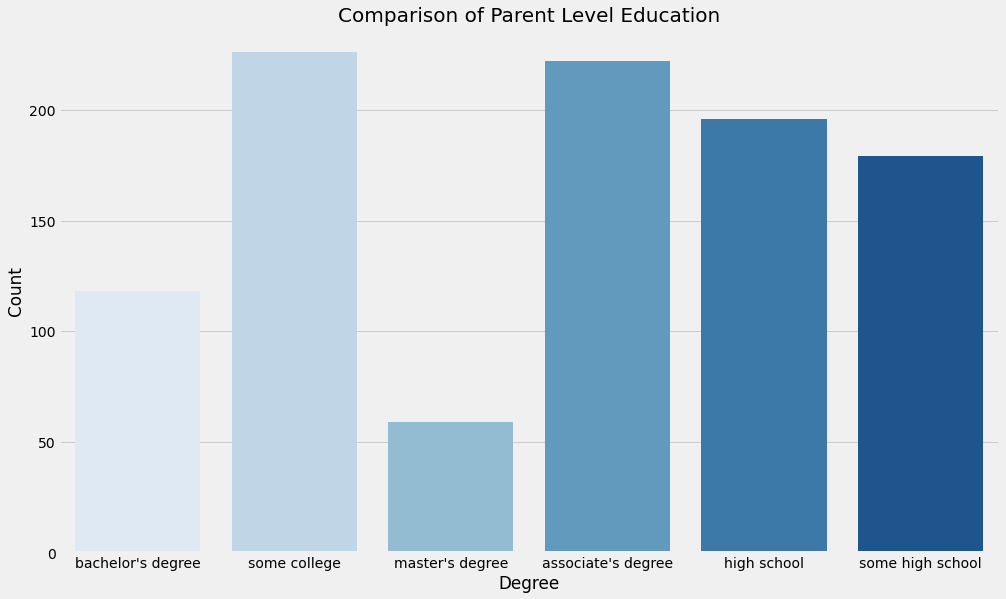

In [184]:
plt.rcParams["figure.figsize"]=(15,9)
plt.style.use("fivethirtyeight")
sns.countplot(df["parental_level_of_education"],palette="Blues")
plt.title("Comparison of Parent Level Education",fontweight=30,fontsize=20)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


###### Inssights:

In [ ]:
-->largest number of parents from some colleges
-->then from associates degree

###### Bivariate analysis

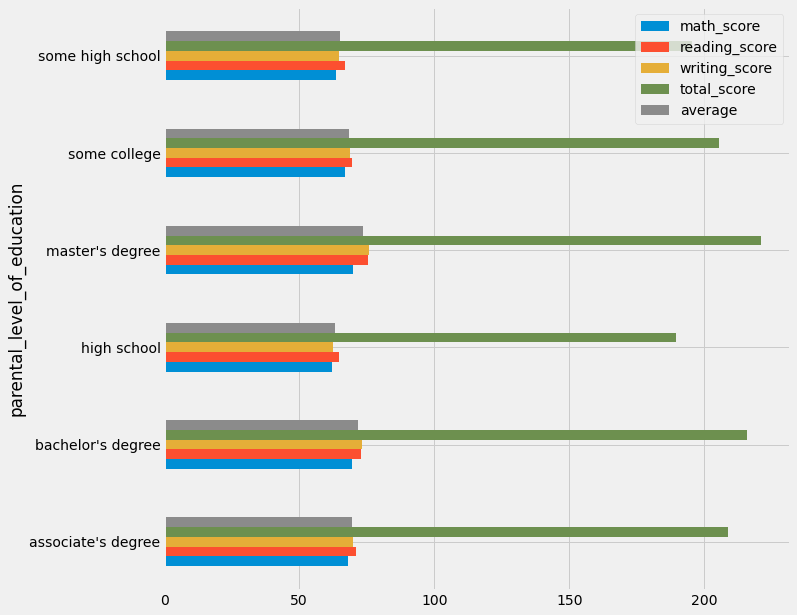

In [188]:
df.groupby("parental_level_of_education").agg("mean").plot(kind="barh",figsize=(10,10))
plt.legend()
plt.show()

###### Insight:

In [ ]:
-->The score of students whose parent possess master and bachlor level of education are higher
   than others

### 4.4.4 Lunch

-->which type of lunch is most common among students
-->What is the effect of lunch type on test results

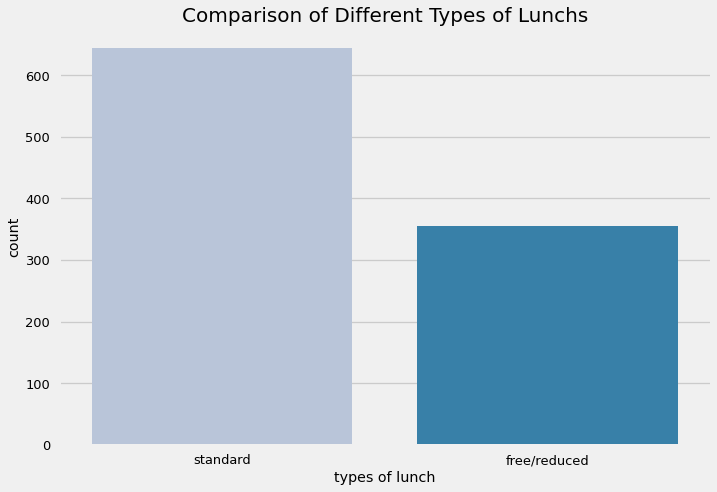

In [193]:
plt.rcParams["figure.figsize"]=(15,9)
plt.style.use("seaborn-talk")
sns.countplot(df["lunch"],palette="PuBu")
plt.title("Comparison of Different Types of Lunchs",fontweight=30,fontsize=20)
plt.xlabel("types of lunch")
plt.ylabel("count")
plt.show()

###### insight:


In [ ]:
-->student serving standard lunch was more than free lunch

##### Bivariate analysis(Is lunch type intake has any impact on students performance)

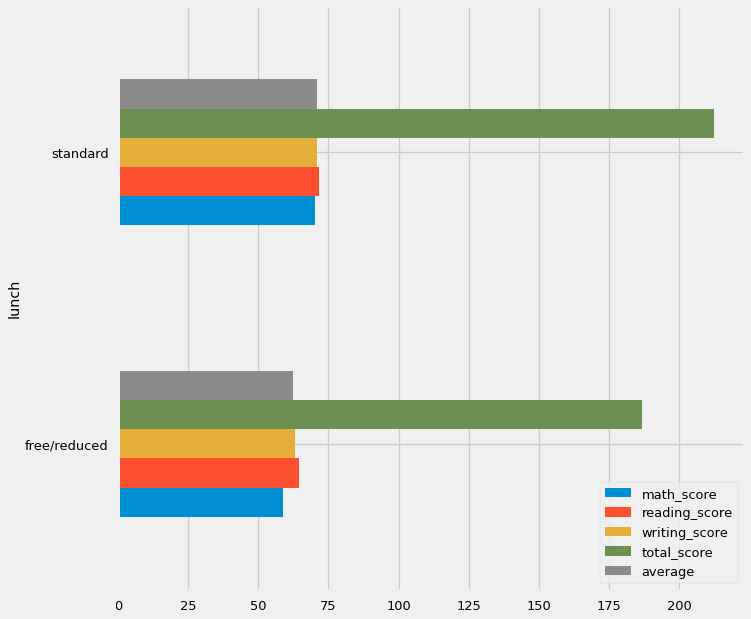

In [196]:
df.groupby("lunch").agg("mean").plot(kind="barh",figsize=(10,10))
plt.legend()
plt.show()

##### Insight:

In [ ]:
-->student who got standard lunch had performed well

##### 4.4.5 Test Preparation Course

In [ ]:
-->Number of students who have done test preparation course
-->Is test preparation course has any effect on student's performance

##### Univariate analysis

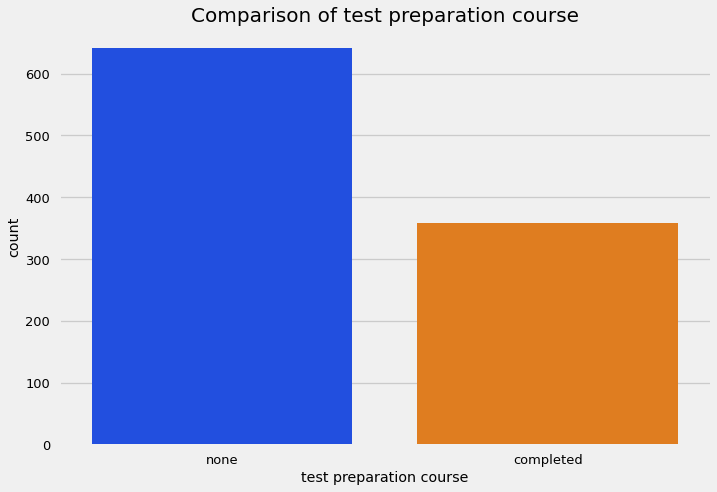

In [199]:
plt.rcParams["figure.figsize"]=(15,9)
plt.style.use("seaborn-talk")
sns.countplot(df["test_preparation_course"],palette="bright")
plt.title("Comparison of test preparation course",fontweight=30,fontsize=20)
plt.xlabel("test preparation course")
plt.ylabel("count")
plt.show()

###### Insight:

In [ ]:
-->more number of students didn't completed test preparation course

##### Bivariate analysis

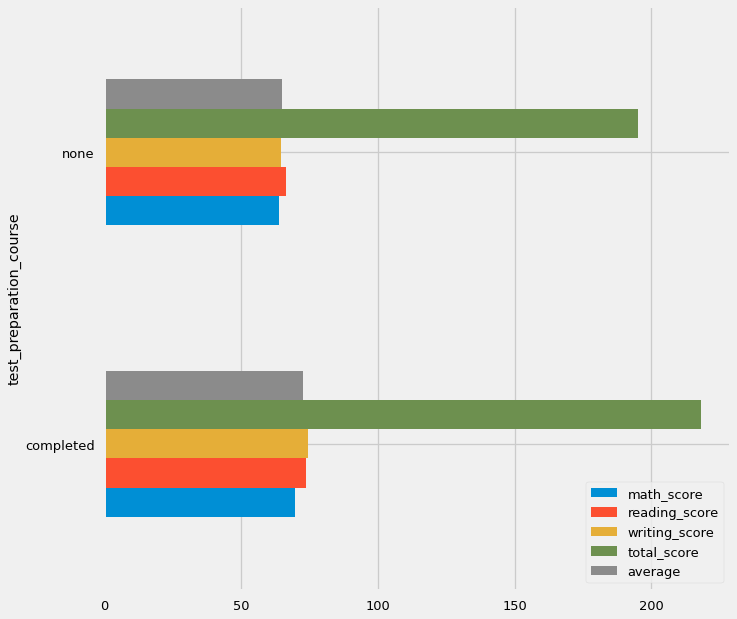

In [200]:
df.groupby("test_preparation_course").agg("mean").plot(kind="barh",figsize=(10,10))
plt.legend()
plt.show()

###### Insight:

In [ ]:
-->students who have completed the test preparation course has score good marks in exams

#### 4.5. Checking Outliers

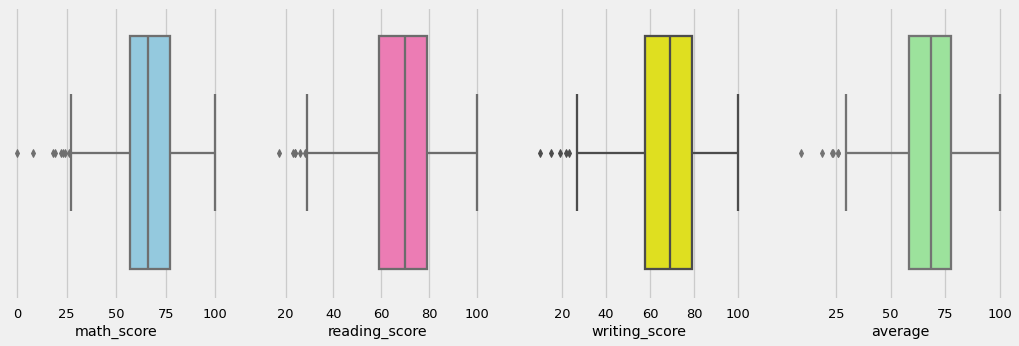

In [202]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

##### 4.7. Multivariate analysis using Pair plot

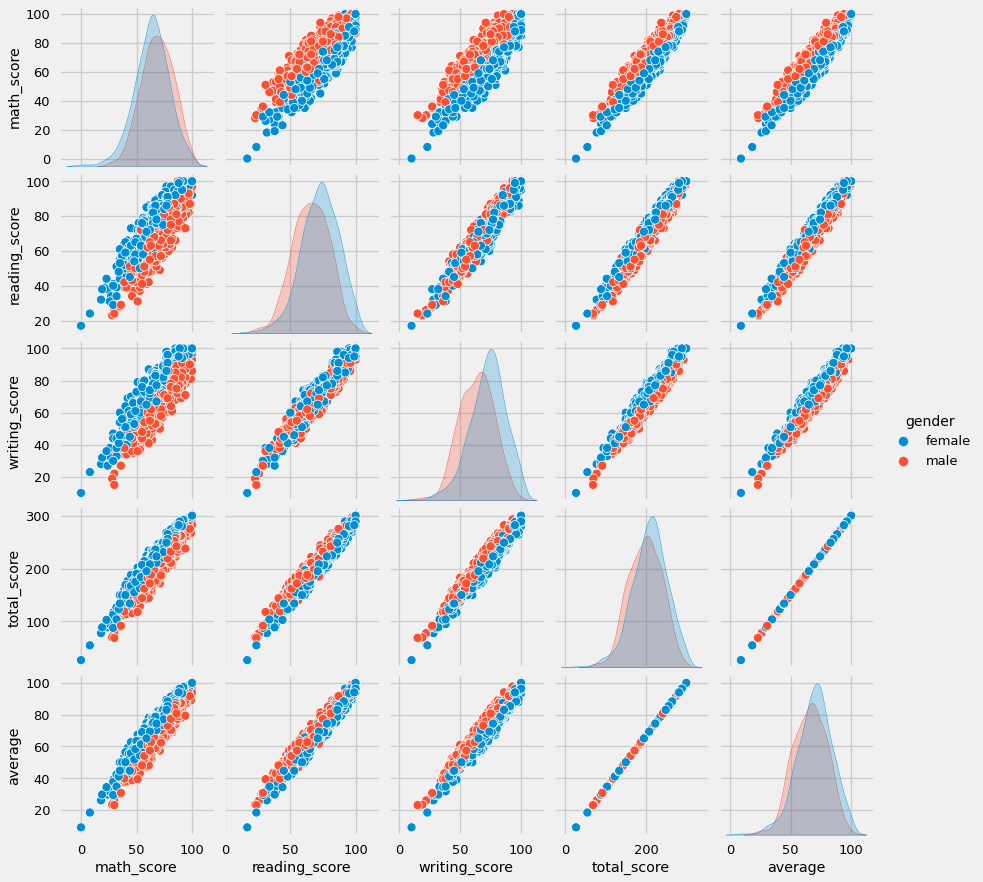

In [203]:
sns.pairplot(df,hue ='gender')
plt.show()

###### Insight:

In [ ]:
-->all the scores increases linearly with each other

###### 5. Conclusion

In [ ]:
-->Student's Performance is related with lunch, race, parental level education
-->Females lead in pass percentage and also are top-scorers
-->Student's Performance is not much related with test preparation course
-->Finishing preparation course is benefitial.